In [80]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [81]:
df = pd.read_csv("./data.csv")
df.columns = ["Frecuencia", "Amplitud"]
df.head()

,Frecuencia,Amplitud
0,400000000.0,-87.984863
1,400079365.1,-87.984863
2,400158730.2,-87.990967
3,400238095.2,-88.528091
4,400317460.3,-88.528091


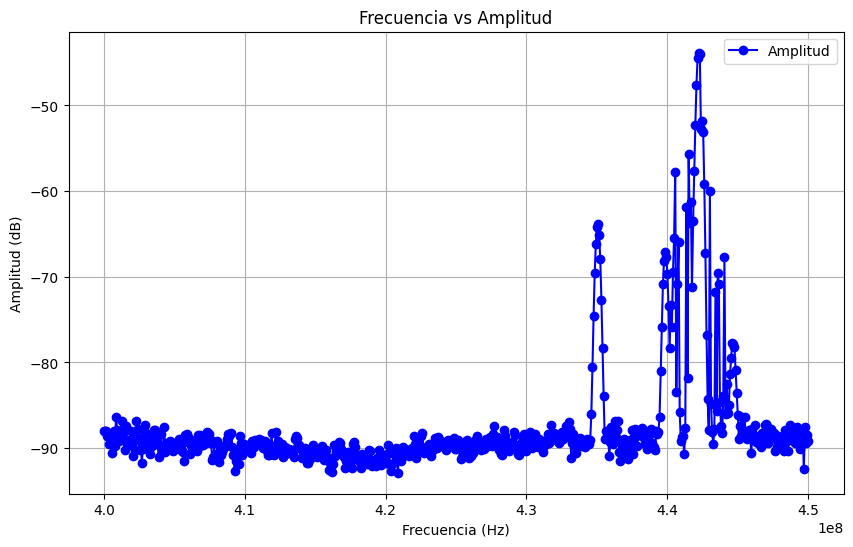

In [82]:
# display matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['Frecuencia'], df['Amplitud'], marker='o', linestyle='-', color='b', label='Amplitud')
plt.title('Frecuencia vs Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
# only from 430000000 to 440000000
df = df[(df['Frecuencia'] >= 430000000) & (df['Frecuencia'] <= 440000000)]

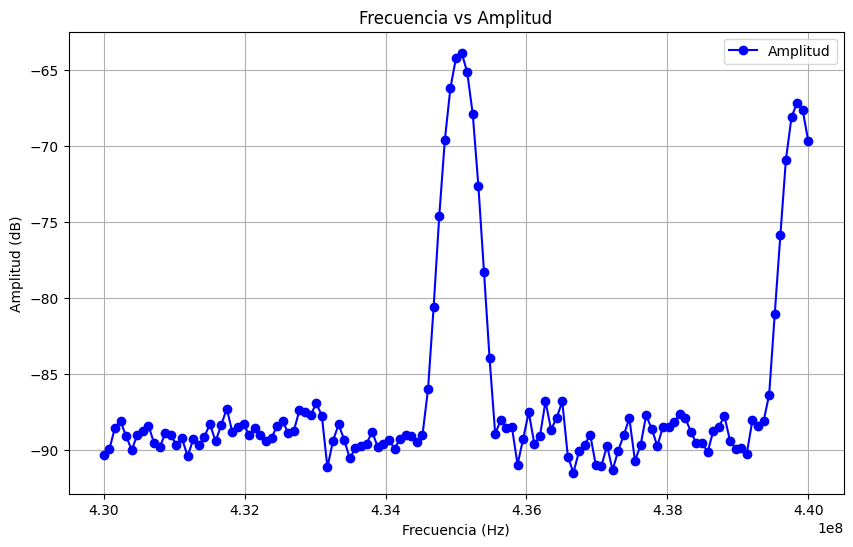

In [84]:
# display matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['Frecuencia'], df['Amplitud'], marker='o', linestyle='-', color='b', label='Amplitud')
plt.title('Frecuencia vs Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
CENTERS = {
    "SAT1": [431000000, 433000000, 435000000],
    "SAT2": [436000000, 437500000, 439000000]
}

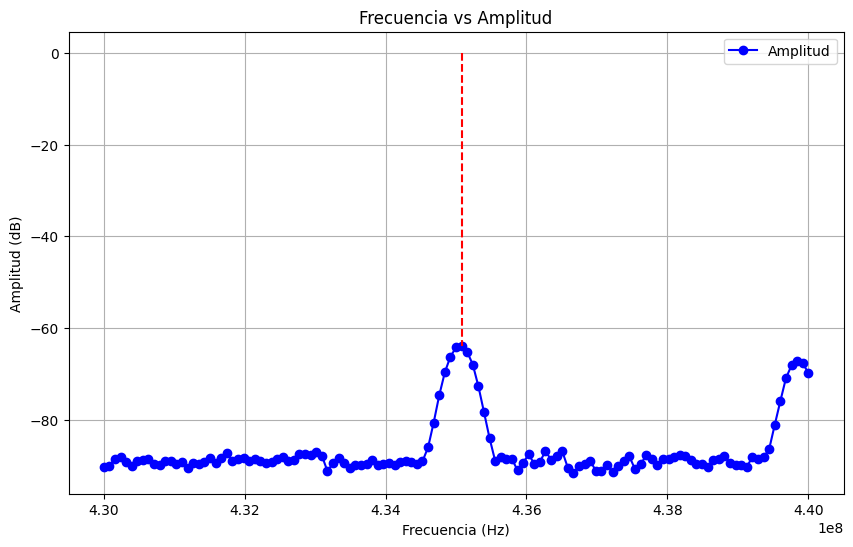

In [86]:
# Obtener los 2 picos más altos, no deben pertenecer a la misma 
peaks, _ = find_peaks(df['Amplitud'], prominence=5)

# Identify peak values
peak_values = df.iloc[peaks]

# Find the highest peak
highest_peak = peak_values.nlargest(1, 'Amplitud')

# Find the second highest peak in a different curve
# Assume a threshold to differentiate curves (e.g., frequency difference > 5 MHz)
second_peak = peak_values[(peak_values['Frecuencia'] - highest_peak['Frecuencia'].values[0]).abs() > 5000000].nlargest(1, 'Amplitud')

# Display the results in the matplotlib with vertical dotted lines
plt.figure(figsize=(10, 6))
plt.plot(df['Frecuencia'], df['Amplitud'], marker='o', linestyle='-', color='b', label='Amplitud')
plt.title('Frecuencia vs Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid(True)
plt.legend()
plt.vlines(highest_peak['Frecuencia'].values, 0, highest_peak['Amplitud'].values, color='r', linestyle='--', label='Pico 1')
plt.vlines(second_peak['Frecuencia'].values, 0, second_peak['Amplitud'].values, color='g', linestyle='--', label='Pico 2')
plt.show()

In [87]:
# Comprobar si los picos pertenecen a las bandas de frecuencia de los satélites con un error de 5 MHz
for sat, freqs in CENTERS.items():
    if (highest_peak['Frecuencia'].values[0] in freqs) and (second_peak['Frecuencia'].values[0] in freqs):
        print(f"Los picos pertenecen a la banda de frecuencia del satélite {sat}")
    else:
        print(f"Los picos no pertenecen a la banda de frecuencia del satélite {sat}")


Los picos no pertenecen a la banda de frecuencia del satélite SAT1
Los picos no pertenecen a la banda de frecuencia del satélite SAT2
